# Real Generation Graphics

- Author: Victor Muñoz
- Collaborator: Nicolás Otárola
- Pvlib_version: 0.6.3
- Date : 17-01-2022 

In [10]:
# data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Photovoltaic systems
import pvlib
from pvlib.pvsystem import PVSystem
from pvlib.location import Location
from pvlib.modelchain import ModelChain

# functions AND system photovoltaic
import sys
sys.path.append('../../')

import funciones as func

import imp
imp.reload(func)

# save graphics
%matplotlib inline
%matplotlib notebook


## 1) Data_real

In [11]:
# Generacion solar

# Leer excel para generar pickle.
name_excel = 'Generacion_real.xlsx'
excel = pd.read_excel(name_excel)

In [12]:
excel.to_pickle("Generacion_real")

In [13]:
# Leer picke una vez ya creado
data_pickle = pd.read_pickle('Generacion_real')


<IPython.core.display.Javascript object>


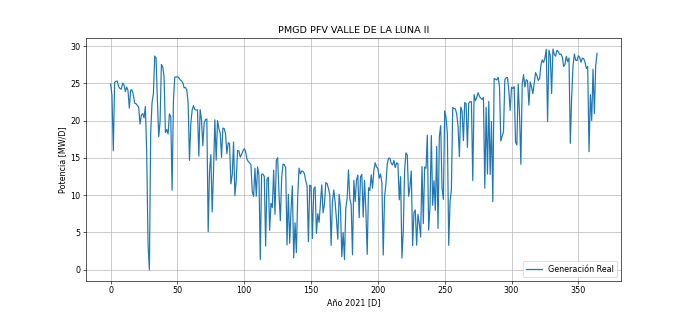

<IPython.core.display.Javascript object>


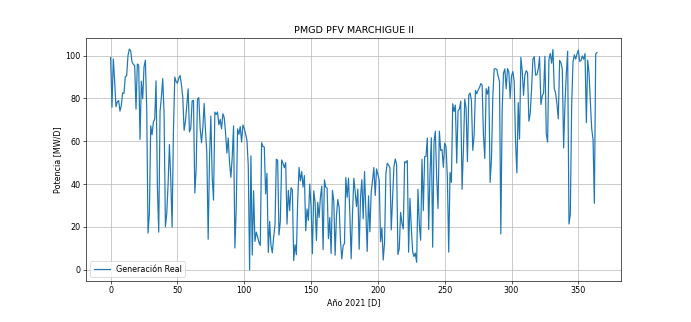

<IPython.core.display.Javascript object>


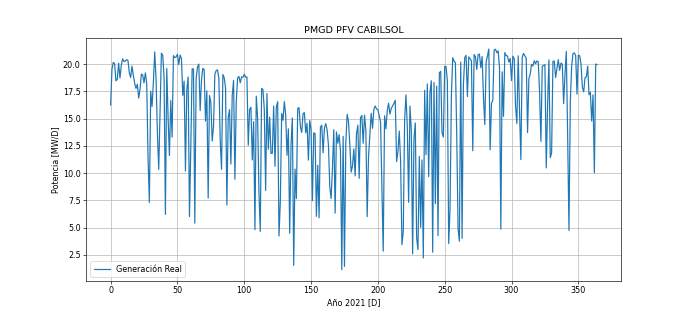

<IPython.core.display.Javascript object>


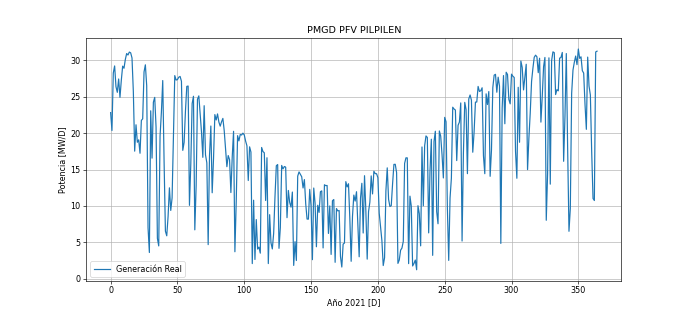

<IPython.core.display.Javascript object>


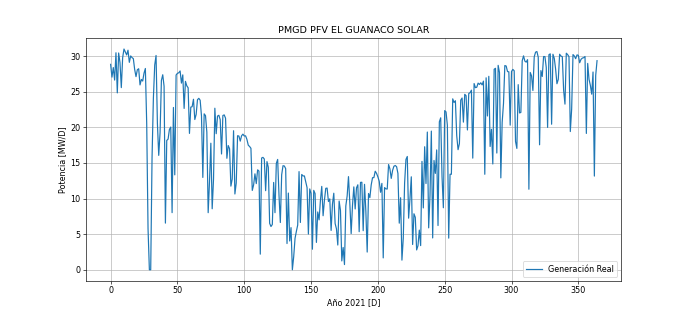

In [54]:
# names for photovoltaics systems
name_pv = ['PMGD PFV VALLE DE LA LUNA II','PMGD PFV MARCHIGUE II','PMGD PFV CABILSOL','PMGD PFV PILPILEN','PMGD PFV EL GUANACO SOLAR']
dic_data_sub = {}
year = 2021
for i in name_pv:
    filter_data = data_pickle[['Fecha', 'año', 'Total']]
    filter_data = filter_data.loc[data_pickle['Central'] == i]
    filter_data = filter_data.loc[filter_data['año'] == year]
    filter_data = filter_data[['Fecha','Total']]
    dic_data_sub[i] = filter_data
    #print(dic_data_sub[i])
    

for i in dic_data_sub:
    filter_data = dic_data_sub[i]
    plt.figure(figsize=(15,7))
    plt.plot(range(len(filter_data)),filter_data['Total'],label='Generación Real')
    #plt.plot(range(len(filter_data)),filter_data['Total'],label='Generación Pred')
    plt.xlabel('Año '+str(year)+' [D]')
    plt.ylabel('Potencia [MW/D]')
    plt.legend()
    plt.grid()
    plt.title(i)
    plt.savefig(i+'.png')
    plt.show()
